## Heart Disease Prediction


### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Content

**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading data from the csv file
hds = pd.read_csv('heart.csv')
hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Checking keys in the data set
hds.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Conversion of data set into data frame
hdf = pd.DataFrame(hds)

In [7]:
# Printing first 5 rows of the data frame
hdf.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Printing last 5 rows of the data frame
hdf.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Printing 10  random rows of the data frame
hdf.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [10]:
# Checking whether any null values present in the data set
hdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Printing columns of the data frame
hdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
# Statistical description of the data
hdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Eye balling of the data
hdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
# Datatypes in the data
hdf.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
# Overview of the data
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
# Finding shape of the data
hdf.shape

(303, 14)

### Feature Selection

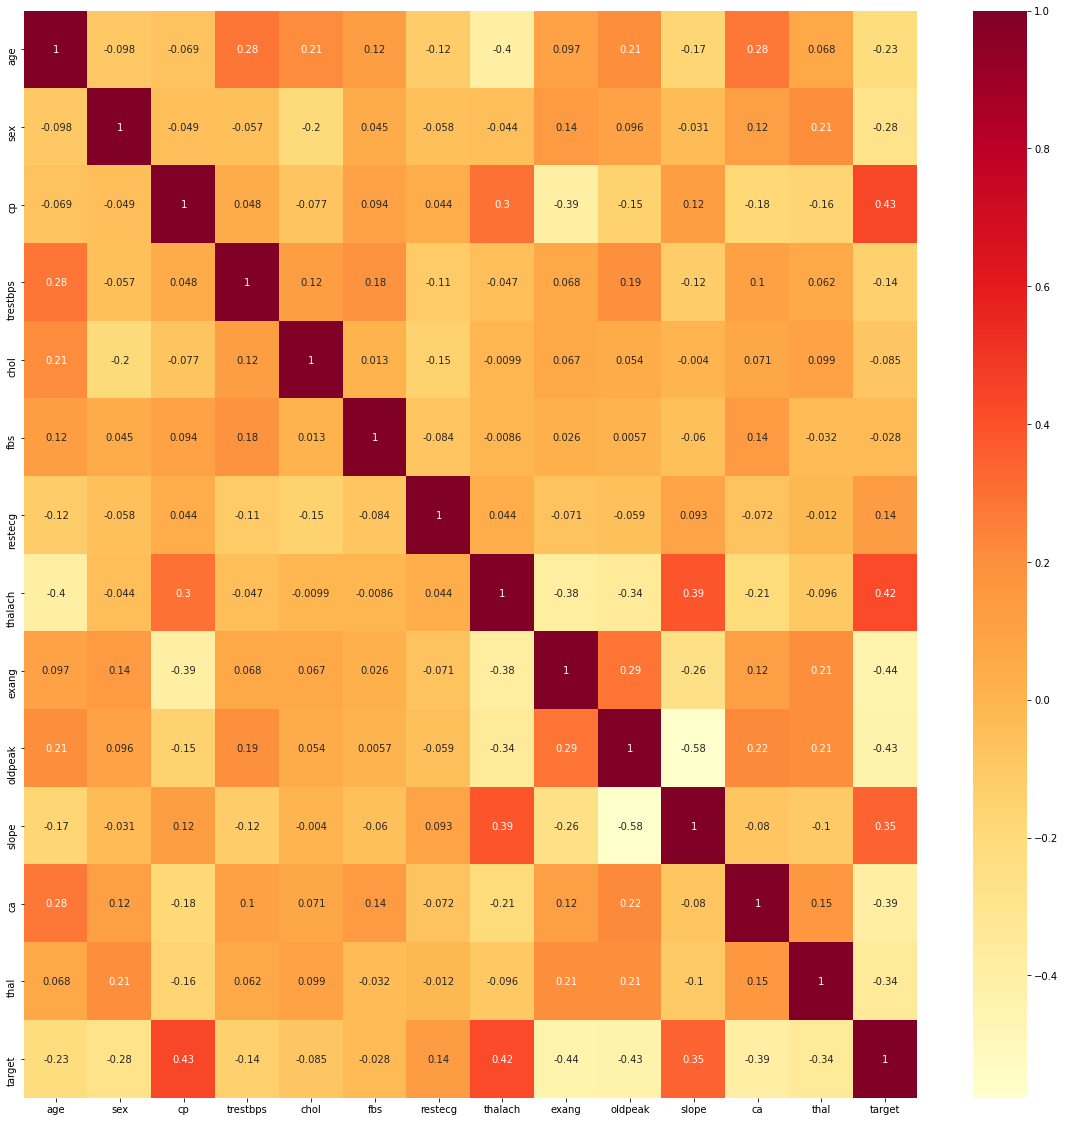

In [17]:
# Apply correlation for all the columns

corrmat = hdf.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
# Plotting heatmap
fs = sns.heatmap(hdf[top_corr_features].corr(), annot = True, cmap =  "YlOrRd")
plt.show(fs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e3de37ac8>,
      dtype=object)

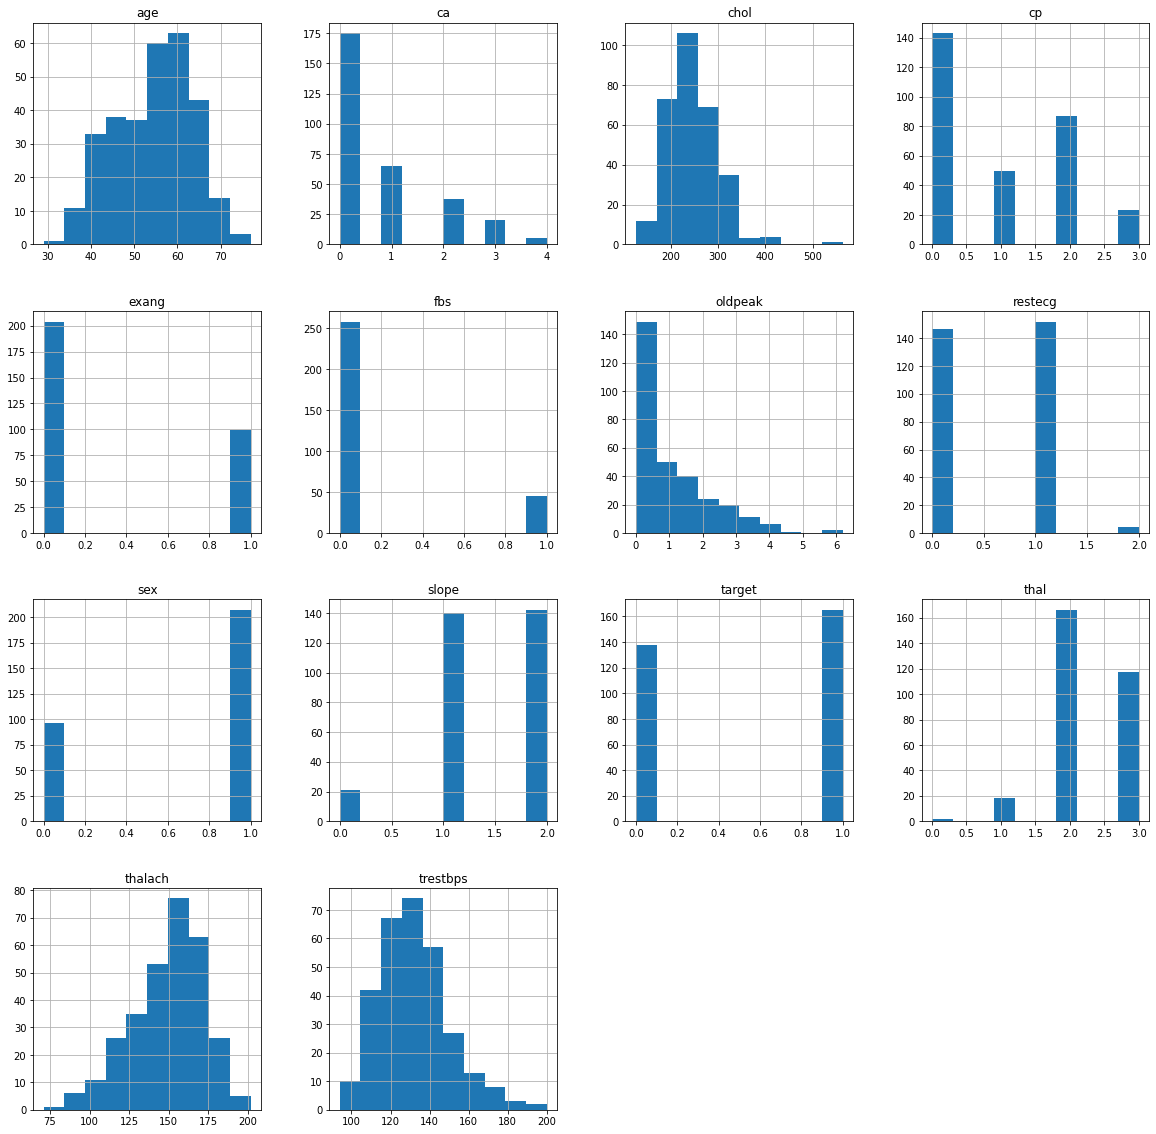

In [18]:
# Histogram view
hdf.hist(figsize = (20,20))
plt.show()

### Exploratory Data Analysis

In [19]:
# Unique values in the data
hdf.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [20]:
# Reference values
hdf.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Value counts of each categorical column

In [21]:
# value counts of sex
# 1-Male 0-Female
hdf['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
# value counts of chest pain
hdf['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [23]:
# value counts of fasting blood sugar
#(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
hdf['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [24]:
# value counts of restecg
hdf['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [25]:
# value counts of exang
#exercise induced angina (1 = yes; 0 = no)
hdf['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [26]:
# value counts of slope
hdf['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [27]:
# value counts of ca
hdf['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [28]:
# value counts of thal
hdf['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### Analysis


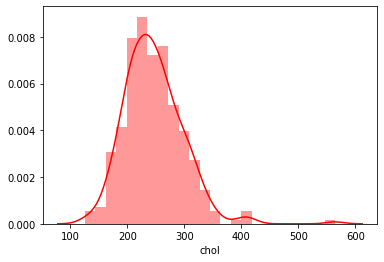

In [29]:
# chol
sns.distplot(hdf['chol'], color = 'r')
plt.show()

**Observation:**
Here in the above figure, the graph is sightly right skewed but there is less chance of outliers present

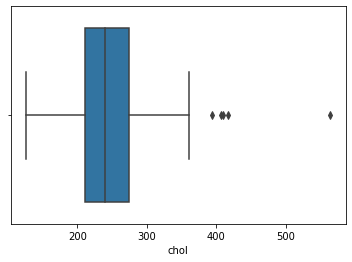

In [30]:
# Outliers detection
sns.boxplot(hdf['chol'])
plt.show()

**Observation:**
Here we can see that there are outliers in the data and they must be treated

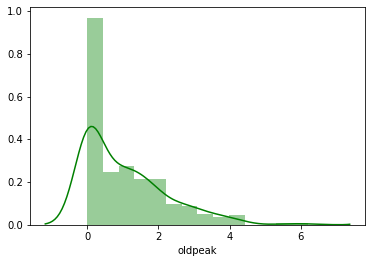

In [31]:
# old peak
sns.distplot(hdf['oldpeak'], color = 'g')
plt.show()

**Observation:**
Here in the above figure, the graph is right skewed and there may be the chance of outliers in the graph

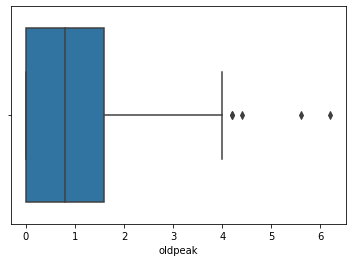

In [32]:
# Finding whether outliers present or not
sns.boxplot(hdf['oldpeak'])
plt.show()

**Observation:**
Here from the graph we can see outliers present in the old peak column data.

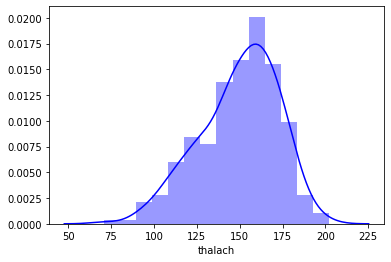

In [33]:
# thalach
sns.distplot(hdf['thalach'], color = 'b')
plt.show()

**Observation:**
Here the graph is sightly left skewed distributed but there may be a less chance of outliers

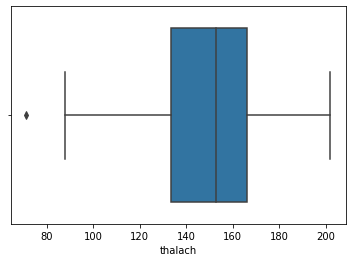

In [34]:
# Outliers detection
sns.boxplot(hdf['thalach'])
plt.show()

**Observation:**
Here we can see the outliers are negligable

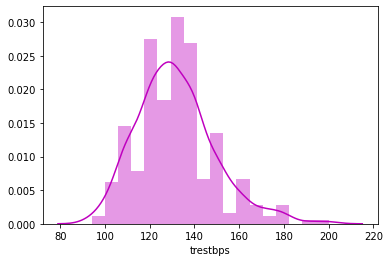

In [35]:
# trestbps
sns.distplot(hdf['trestbps'], color = 'm')
plt.show()

**Observation:**
Here in the graph we can see that data is normally distributed so there may not be any outliers in the data

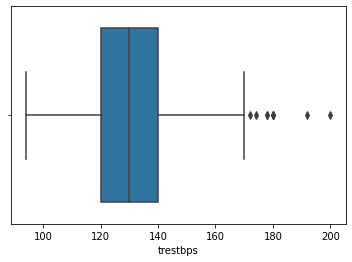

In [36]:
# Outliers detection
sns.boxplot(hdf['trestbps'])
plt.show()

**Observation:**
Here from the graph we can say that though we concluded as there might not be any ouliers, there are outliers present and must be treated.

### Multivariate analysis

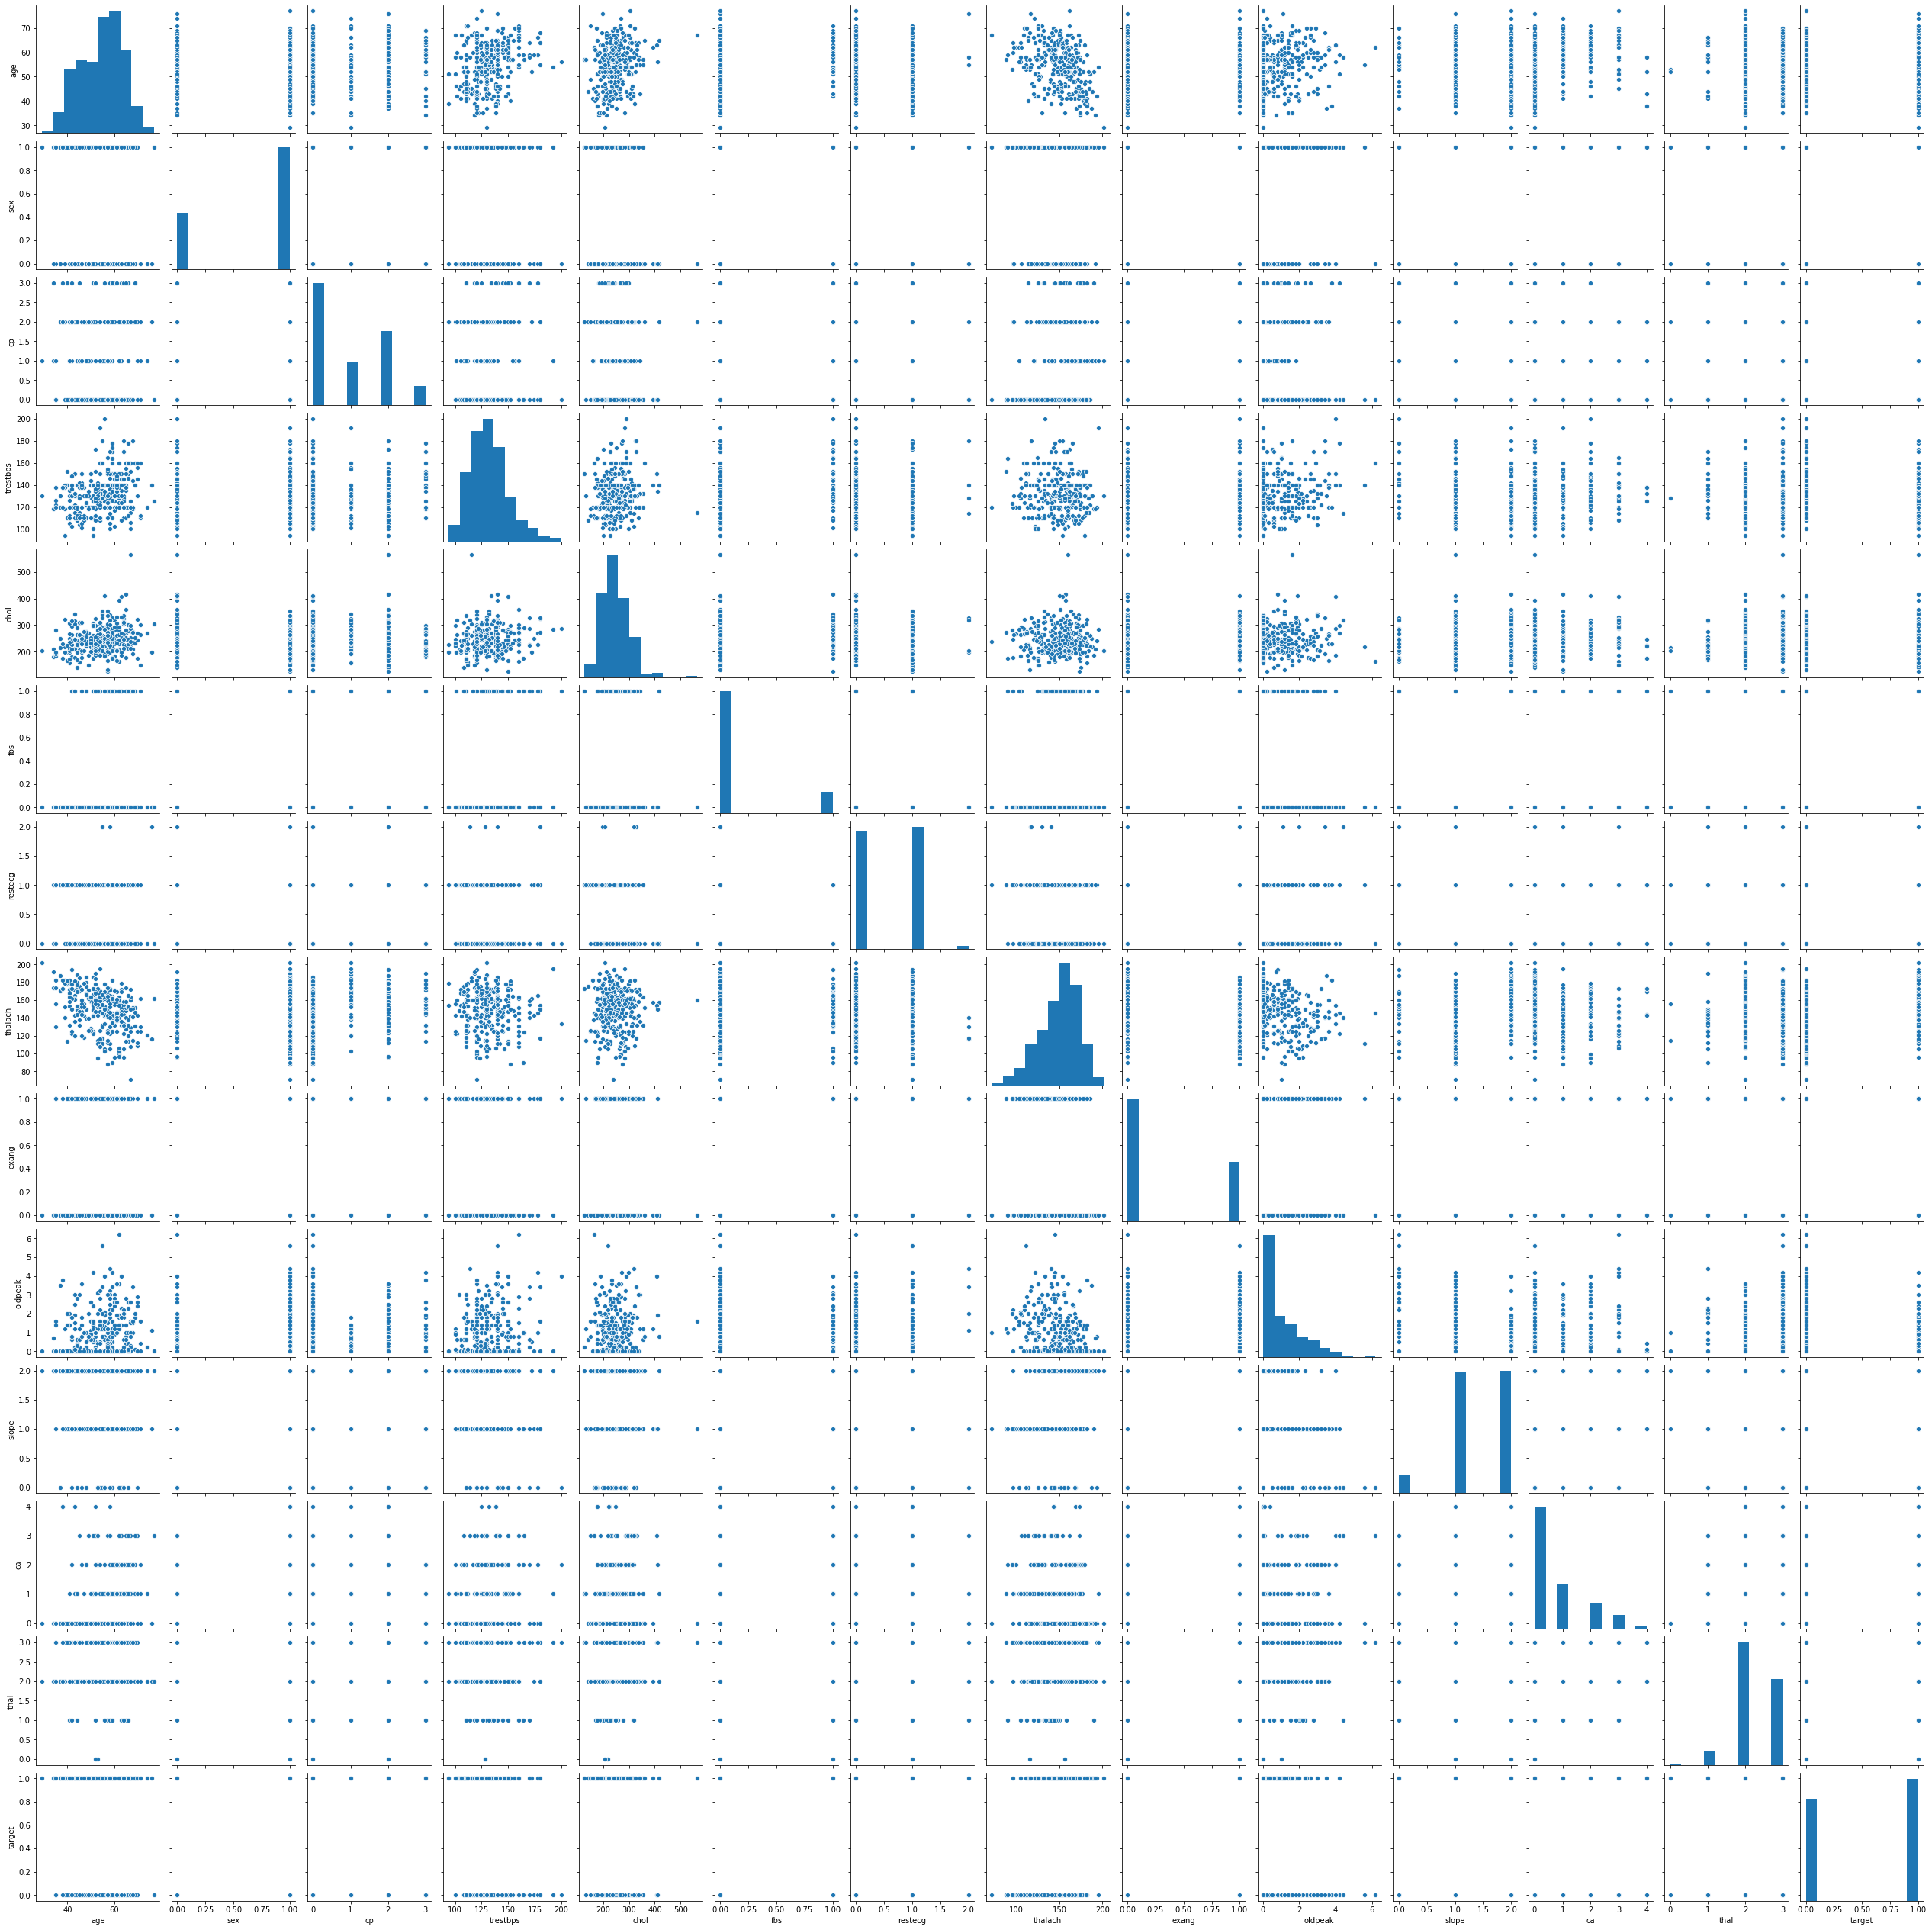

In [37]:
# Representing data with multivariate analysis
sns.pairplot(hdf.iloc[:,:])
plt.show()

### Data Preprocessing
After exploring the dataset, I observed that I to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categroical variables.

In [38]:
ds = pd.get_dummies(hdf, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [39]:

ss = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
ds[columns_to_scale] = ss.fit_transform(ds[columns_to_scale])

In [40]:
ds.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [41]:
X = ds.drop(['target'], axis = 1)
y = ds.target

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X, y, cv = 10)
    knn_scores.append(score.mean())

<Figure size 3960x2520 with 0 Axes>

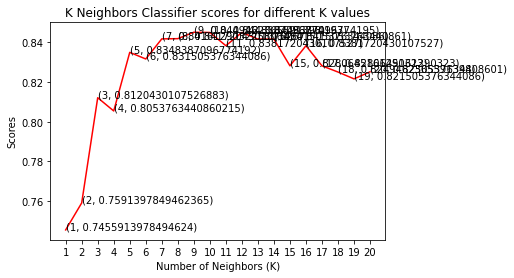

<Figure size 3960x2520 with 0 Axes>

In [60]:

plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.figure(figsize = (55,35))

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, X, y, cv = 10)

In [45]:
score.mean()

0.8448387096774195

### Random Forest Classifier

In [46]:
randomforest_classifier = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(randomforest_classifier, X, y, cv = 10)

In [47]:
score.mean()

0.8050537634408602

### Decision Tree Classifier

In [48]:

dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dt_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [49]:
dt_model.score(X, y)

1.0

In [50]:
score = cross_val_score(dt_model, X, y, cv = 10)

In [51]:
score.mean()

0.7254838709677419

### Conclusive Analysis

**Observation:** From the above scores of different machine learning models, we can see that K-Nearest Neighbors showing good score when compared to Decision Tree Classifier and Random Forest Classifier.